In [8]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
# Reading Dataset
yelp_business = pd.read_csv('/home/luma/Downloads/yelp_training_set_flattened.csv')

In [10]:
yelp_business.head(1)

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q


In [11]:
# Columns list
print(yelp_business.columns.tolist())

['Unnamed: 0', 'business_blank', 'business_categories', 'business_city', 'business_full_address', 'business_id', 'business_latitude', 'business_longitude', 'business_name', 'business_neighborhoods', 'business_open', 'business_review_count', 'business_stars', 'business_state', 'business_type', 'cool', 'date', 'funny', 'review_id', 'reviewer_average_stars', 'reviewer_blank', 'reviewer_cool', 'reviewer_funny', 'reviewer_name', 'reviewer_review_count', 'reviewer_type', 'reviewer_useful', 'stars', 'text', 'type', 'useful', 'user_id']


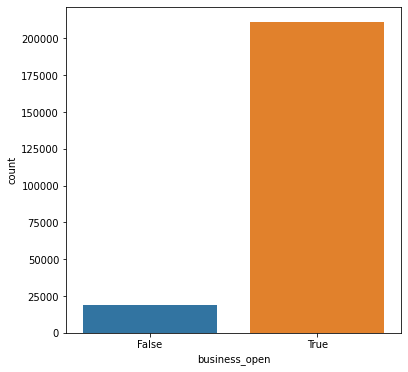

In [12]:
# Count for Number businesses Open and Close
plt.figure(figsize=(6,6))
sns.countplot(x='business_open',data=yelp_business);

In [13]:
#Regression Model
# These are the columns which are independant variables
cols1 = ['business_latitude',
 'business_longitude',
 'business_stars',
 'business_review_count']

In [14]:
X = yelp_business[cols1]
y = yelp_business['business_open']

In [15]:
# If anything has empty value then fill it with 0.0
X.fillna(0.0,inplace=True) 

/home/luma/.local/lib/python3.8/site-packages/pandas/core/frame.py:4321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [16]:
# Split the dataset for training and testing
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [20]:
# Sampling
sm = SMOTE(random_state=42)

In [21]:
# Fit the training set
X_res, y_res = sm.fit_sample(train_X, train_y)

In [45]:
# Make all of these as Dataframes
X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)
test_X = pd.DataFrame(test_X)
test_y = pd.DataFrame(test_y)

In [46]:
# from sklearn.linear_model import LinearRegeression
LR = linear_model.LinearRegression()
LR.fit(X_res,y_res)

pred_y = LR.predict(test_X)


In [58]:
accuracy_score(test_y.values,pred_y.round())

0.5635828512606382

In [59]:
print(classification_report(test_y.values, pred_y.round()))

              precision    recall  f1-score   support

           0       0.13      0.74      0.22      5713
           1       0.96      0.55      0.70     63260

    accuracy                           0.56     68973
   macro avg       0.54      0.64      0.46     68973
weighted avg       0.89      0.56      0.66     68973



In [62]:
# Confusion metrics
confusion_matrix(test_y.values,pred_y.round())

array([[ 4211,  1502],
       [28599, 34661]])

In [63]:
# Final accuracy score
accuracy_score(test_y.values,pred_y.round())

0.5635828512606382

In [64]:
# Contribution of each variable
LR.coef_

array([[-0.14657988,  0.0239883 ,  0.10533271,  0.00119477]])